In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import zipfile
import os

In [17]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = keras.utils.get_file("cats_and_dogs_filtered.zip", origin=_URL)

extract_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered_extracted")

if not os.path.exists(extract_dir):
    os.mkdir(extract_dir)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 3) Set correct directory paths
PATH = os.path.join(extract_dir, "cats_and_dogs_filtered")
train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")

print("Dataset Ready ✅")
print("Train folder:", train_dir)
print("Validation folder:", validation_dir)


Dataset Ready ✅
Train folder: d:\Python\CAT&DOG\cats_and_dogs_filtered_extracted\cats_and_dogs_filtered\train
Validation folder: d:\Python\CAT&DOG\cats_and_dogs_filtered_extracted\cats_and_dogs_filtered\validation


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [21]:
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [22]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

d:\Python\CAT&DOG\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 766ms/step - accuracy: 0.5230 - loss: 0.7812 - val_accuracy: 0.5000 - val_loss: 0.6892
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 445ms/step - accuracy: 0.5440 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6842
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 440ms/step - accuracy: 0.5570 - loss: 0.6861 - val_accuracy: 0.5650 - val_loss: 0.6681
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 444ms/step - accuracy: 0.5895 - loss: 0.6683 - val_accuracy: 0.6170 - val_loss: 0.6520
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 440ms/step - accuracy: 0.6125 - loss: 0.6490 - val_accuracy: 0.5660 - val_loss: 0.6444
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 441ms/step - accuracy: 0.6325 - loss: 0.6354 - val_accuracy: 0.6580 - val_loss: 0.6144
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 442ms/step - accuracy: 0.6435 - loss: 0.6298 - val_accuracy: 0.6040 - val_loss: 0.6498
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 443ms/step - accuracy: 0.6660 - loss: 0.6164 - val_accu

In [25]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [26]:
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [27]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
history = model.fit(
    train_generator,
    epochs=7,
    validation_data=validation_generator
)

Epoch 1/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7245 - loss: 0.5907 - val_accuracy: 0.8180 - val_loss: 0.3687
Epoch 2/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8000 - loss: 0.4303 - val_accuracy: 0.8670 - val_loss: 0.3055
Epoch 3/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8190 - loss: 0.3953 - val_accuracy: 0.8790 - val_loss: 0.2960
Epoch 4/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8140 - loss: 0.3958 - val_accuracy: 0.8830 - val_loss: 0.2752
Epoch 5/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8235 - loss: 0.3862 - val_accuracy: 0.8810 - val_loss: 0.2772
Epoch 6/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8405 - loss: 0.3598 - val_accuracy: 0.8830 - val_loss: 0.2780
Epoch 7/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8265 - loss: 0.3684 - val_accuracy: 0.8850 - val_loss: 0.2614


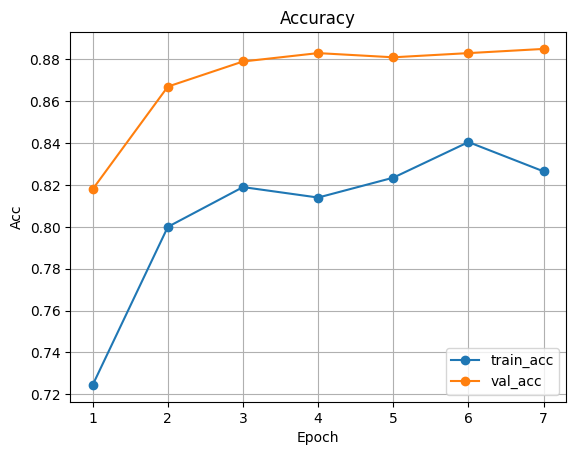

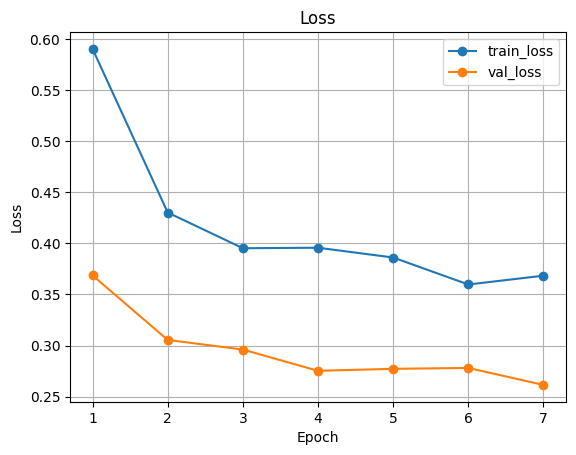

In [29]:
import matplotlib.pyplot as plt

def plot_history(h):
    acc = h.history['accuracy']; val_acc = h.history['val_accuracy']
    loss = h.history['loss'];     val_loss = h.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(); plt.plot(epochs, acc, 'o-', label='train_acc'); plt.plot(epochs, val_acc, 'o-', label='val_acc')
    plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Acc'); plt.legend(); plt.grid(True)

    plt.figure(); plt.plot(epochs, loss, 'o-', label='train_loss'); plt.plot(epochs, val_loss, 'o-', label='val_loss')
    plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

plot_history(history)


Found 1000 images belonging to 2 classes.
              precision    recall  f1-score   support

        cats       0.88      0.89      0.89       500
        dogs       0.89      0.88      0.88       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.88      1000
weighted avg       0.89      0.89      0.88      1000



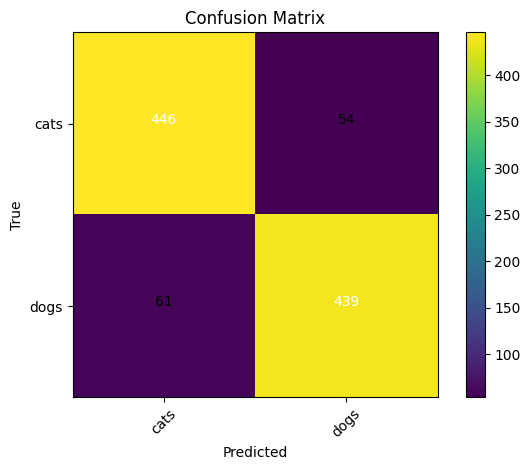

In [30]:
import numpy as np, itertools, matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions for the entire validation set
val_generator_for_eval = val_datagen.flow_from_directory(
    validation_dir, target_size=(150,150), batch_size=32,
    class_mode='binary', shuffle=False)

pred_probs = model.predict(val_generator_for_eval, verbose=0)
preds = (pred_probs.ravel() >= 0.5).astype(int)
y_true = val_generator_for_eval.classes
class_indices = val_generator_for_eval.class_indices
idx_to_class = {v:k for k,v in class_indices.items()}

print(classification_report(y_true, preds, target_names=[idx_to_class[0], idx_to_class[1]]))

cm = confusion_matrix(y_true, preds)
plt.figure()
plt.imshow(cm, interpolation='nearest'); plt.title('Confusion Matrix'); plt.colorbar()
tick_marks = np.arange(len(class_indices))
plt.xticks(tick_marks, [idx_to_class[i] for i in tick_marks], rotation=45)
plt.yticks(tick_marks, [idx_to_class[i] for i in tick_marks])
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True'); plt.xlabel('Predicted'); plt.tight_layout()


In [32]:
base_model.trainable = True

for layer in base_model.layers:
    if "block5" not in layer.name:
        layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_generator,
    epochs=4,
    validation_data=validation_generator
)

Epoch 1/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.8515 - loss: 0.3418 - val_accuracy: 0.9060 - val_loss: 0.2451
Epoch 2/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8715 - loss: 0.2886 - val_accuracy: 0.8990 - val_loss: 0.2300
Epoch 3/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8880 - loss: 0.2665 - val_accuracy: 0.9220 - val_loss: 0.2135
Epoch 4/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8980 - loss: 0.2565 - val_accuracy: 0.9260 - val_loss: 0.2091


Found 1000 images belonging to 2 classes.
              precision    recall  f1-score   support

        cats       0.94      0.91      0.92       500
        dogs       0.91      0.94      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



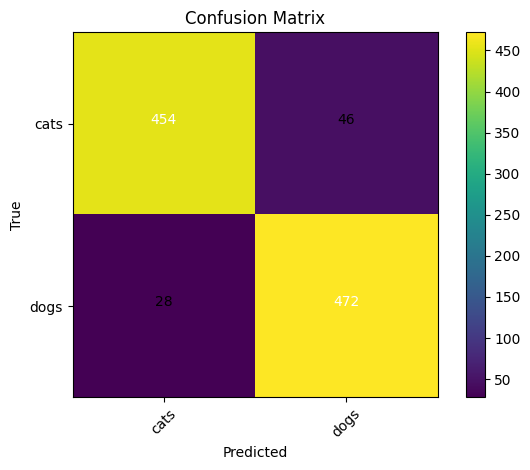

In [33]:
import numpy as np, itertools, matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions for the entire validation set
val_generator_for_eval = val_datagen.flow_from_directory(
    validation_dir, target_size=(150,150), batch_size=32,
    class_mode='binary', shuffle=False)

pred_probs = model.predict(val_generator_for_eval, verbose=0)
preds = (pred_probs.ravel() >= 0.5).astype(int)
y_true = val_generator_for_eval.classes
class_indices = val_generator_for_eval.class_indices
idx_to_class = {v:k for k,v in class_indices.items()}

print(classification_report(y_true, preds, target_names=[idx_to_class[0], idx_to_class[1]]))

cm = confusion_matrix(y_true, preds)
plt.figure()
plt.imshow(cm, interpolation='nearest'); plt.title('Confusion Matrix'); plt.colorbar()
tick_marks = np.arange(len(class_indices))
plt.xticks(tick_marks, [idx_to_class[i] for i in tick_marks], rotation=45)
plt.yticks(tick_marks, [idx_to_class[i] for i in tick_marks])
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True'); plt.xlabel('Predicted'); plt.tight_layout()


In [35]:
import os
print(os.getcwd())

d:\Python\CAT&DOG


In [36]:
import glob
for file in glob.glob("**/*.h5", recursive=True):
    print(file)


env\Lib\site-packages\h5py\tests\data_files\vlen_string_dset.h5
env\Lib\site-packages\h5py\tests\data_files\vlen_string_dset_utc.h5
env\Lib\site-packages\h5py\tests\data_files\vlen_string_s390x.h5


In [38]:
dir()

['ImageDataGenerator',
 'In',
 'Out',
 'PATH',
 'VGG16',
 '_',
 '_URL',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'base_model',
 'base_path',
 'class_indices',
 'classification_report',
 'cm',
 'confusion_matrix',
 'exit',
 'extract_dir',
 'file',
 'get_ipython',
 'glob',
 'history',
 'history_ft',
 'i',
 'idx_to_class',
 'itertools',
 'j',
 'keras',
 'layer',
 'layers',
 'load_model',
 'model',
 'np',
 'open',
 'os',
 'path_to_zip',
 'plot_history',
 'plt',
 'pred_probs',
 'preds',
 'quit',
 'tf',
 'thresh',
 'tic

In [39]:
model.save("cat_dog_classifier_vgg16_finetuned.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [41]:
from tensorflow.keras.models import load_model
model = load_model(r"cat_dog_classifier_vgg16_finetuned.h5")
print("✅ Model loaded!")

✅ Model loaded!


In [42]:
import numpy as np
from tensorflow.keras.preprocessing import image


In [43]:
def test_image(img_path):
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    pred = model.predict(x)[0][0]

    if pred >= 0.5:
        print(f"{img_path} → 🐶 DOG (confidence: {pred:.3f})")
    else:
        print(f"{img_path} → 🐱 CAT (confidence: {1-pred:.3f})")

# ✅ Test your images
test_image(r"test_img\dogesh1.jpg")
test_image(r"test_img\bilauta2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
test_img\dogesh1.jpg → 🐶 DOG (confidence: 1.000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
test_img\bilauta2.jpg → 🐱 CAT (confidence: 1.000)


In [44]:
test_image(r"test_img\dogesh1.jpg")
test_image(r"test_img\kuteshwar.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
test_img\dogesh1.jpg → 🐶 DOG (confidence: 1.000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
test_img\kuteshwar.webp → 🐶 DOG (confidence: 1.000)


In [45]:
test_image(r"test_img\bilauta1.avif")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
test_img\bilauta1.avif → 🐱 CAT (confidence: 0.999)
